This dataset is retrieved from Kaggle: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website

### **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

### **Problem Definition**

The goal of this regression problem is to predict the `Yearly Amount Spent` by customers in an online clothing store based on their usage patterns, membership details, and other behavioral features.

The dataset contains customer behavior data retrieved from both the mobile app and website of the online clothing store. This includes the time customers spend on the app and website, their average session length, and how long they've been members. The company wants to use these factors to better understand and predict customer spending, enabling more effective marketing strategies, product recommendations, and overall customer experience improvements.

This model can help the store to get better understanding about their customer's spending patterns and then create online marketing strategies and choosing which platform to enhance to increase customer engagement and sales.

### **Data Understanding**

In [2]:
df = pd.read_csv("Ecommerce Customers.csv", delimiter=',')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**About the data**

1. Email: customer's email used to register to the mobile app or website
2. Address: customer's address registered
3. Avatar: the avatar color chosen by the customer
4. Avg. Session Length: the average duration of sessions (in Minutes) of Mobile and Website
5. Time on App: the total amount of time (in Minutes) that a customer spends using the mobile App application
6. Time on Website: the total amount of time (in minutes) that a customer spends on the website.
7. Length of Membership: the duration of membership or loyalty of each customer (in Months)
8. Yearly Amount Spent: the total amount of money spent by each customer on the company's products Via an year

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (500, 8)


Our dataset have 500 rows and 8 columns/features.

In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


The information shows that our dataset have various scale ranging from 0.2 to 765.51. This information can be important to decide whether to scale the data or not.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


From the information above, we can confirm that our dataset have 2 different datatypes: 
- float: 5 variables
- object: 3 variables

This will help for data processing

**Group data based on datatype**

In [7]:
df.select_dtypes(include='object').columns

Index(['Email', 'Address', 'Avatar'], dtype='object')

In [8]:
cat_cols = df[['Email', 'Address', 'Avatar']]

In [9]:
df.select_dtypes(exclude='object').columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
num_cols = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent']]

### **Value counts for categorical columns**

#### **1. Email**

In [11]:
print("Unique values in Email:", df['Email'].nunique())
df['Email'].value_counts()

Unique values in Email: 500


Email
hannahwilson@davidson.com          1
mstephenson@fernandez.com          1
hduke@hotmail.com                  1
pallen@yahoo.com                   1
riverarebecca@gmail.com            1
                                  ..
denise22@hernandez-townsend.com    1
youngbarbara@yahoo.com             1
william25@mcconnell.com            1
ijones@schaefer-carr.net           1
heatherhall@yahoo.com              1
Name: count, Length: 500, dtype: int64

Email has 500 unique values because email addresses are unique per customer. But I will extract only the email provider (@example.com). It might be useful grouping by the email provider.

In [12]:
df['email_provider'] = df['Email'].str.extract(r'(@[\w\.-]+)')
df = df.drop("Email", axis = 1)

In [13]:
print("Unique values in email provider:", df['email_provider'].nunique())
df['email_provider'].value_counts()

Unique values in email provider: 244


email_provider
@hotmail.com        87
@gmail.com          87
@yahoo.com          76
@davis.com           2
@edwards.com         2
                    ..
@sanchez.org         1
@lowery.net          1
@chan.biz            1
@craig-evans.com     1
@davidson.com        1
Name: count, Length: 244, dtype: int64

It still have a big amount of unique values after extracting the email provider. Later I will group email providers that are less than 15% occurences as `others`

#### **2. Address**

In [14]:
print("Unique values in Address:", df['Address'].nunique())
df['Address'].value_counts()

Unique values in Address: 500


Address
49791 Rachel Heights Apt. 898\nEast Drewborough, OR 55919-9528    1
835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
4547 Archer Common\nDiazchester, CA 06566-8576                    1
24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564        1
1414 David Throughway\nPort Jason, OH 22070-1220                  1
                                                                 ..
USNS Cardenas\nFPO AA 85439-9449                                  1
019 Elliott Tunnel Suite 190\nNicholsbury, WV 60804-4440          1
9495 Mary Fall Apt. 777\nGlassport, ND 17957-5596                 1
657 Judith Crossroad\nHancockchester, VI 75658-5788               1
8522 Regina Port Suite 782\nPort Kaitlin, TX 50501-7264           1
Name: count, Length: 500, dtype: int64

There are also 500 unique values because address of each customer is different. I noticed that behind each address, they inserted their state abbreviation and ZIP Code. I will extract the state and ZIP Code and check whether it affects our target or not.

In [15]:
df['State'] = df['Address'].str.extract(r'([A-Z]{2}) \d{5}')
df['ZIP Code'] = df['Address'].str.extract(r'(\d{5})')
df = df.drop('Address', axis = 1)

In [16]:
print("Unique values in State:", df['State'].nunique())
df['State'].value_counts()

Unique values in State: 62


State
AE    18
AA    17
SC    13
MO    13
DE    13
      ..
UT     5
MD     5
WI     5
WA     4
ID     3
Name: count, Length: 62, dtype: int64

There are still alot of states here, I will group values that occured less than 5% as `other`.

In [17]:
print("Unique values in ZIP Code:", df['ZIP Code'].nunique())
df['ZIP Code'].value_counts()

Unique values in ZIP Code: 497


ZIP Code
64460    2
50639    2
51173    2
97450    1
98456    1
        ..
32122    1
84050    1
70129    1
52039    1
68388    1
Name: count, Length: 497, dtype: int64

Since there are alot of unique values here, I will drop the column.

In [18]:
df = df.drop('ZIP Code', axis = 1)

#### **3. Avatar**

In [19]:
print("Unique labels in Avatar:", df['Avatar'].nunique())
df['Avatar'].value_counts()

Unique labels in Avatar: 138


Avatar
Teal              7
Cyan              7
CadetBlue         7
GreenYellow       7
SlateBlue         7
                 ..
PaleGoldenRod     1
Coral             1
NavajoWhite       1
PaleGreen         1
LightSlateGray    1
Name: count, Length: 138, dtype: int64

There are 138 unique values in `Avatar`, but it's colors in different shades. I will drop this variable since it's not relevant to the data.

In [20]:
df = df.drop('Avatar', axis = 1)

### **Exploratory Data Analysis**

1. Correlation of each numeric variable with target variable

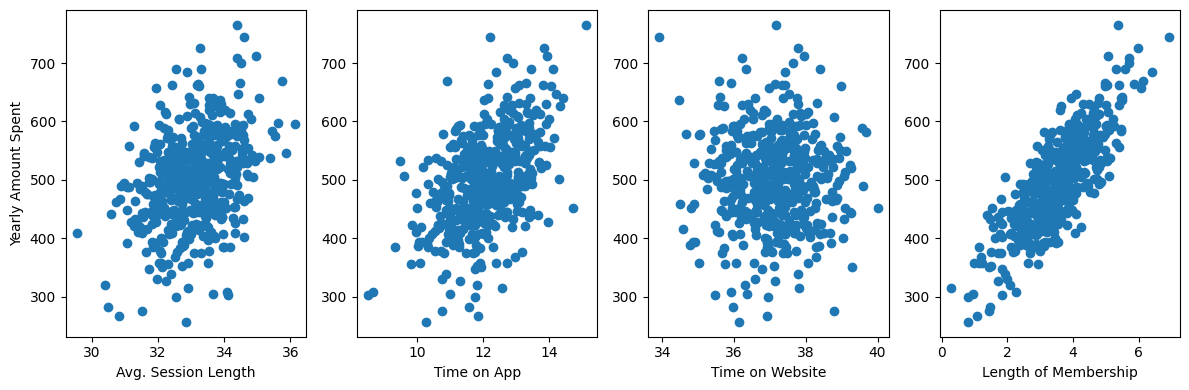

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(12, 4))

ax[0].set_ylabel('Yearly Amount Spent')

ax[0].scatter(x='Avg. Session Length', y='Yearly Amount Spent', data=df)
ax[0].set_xlabel('Avg. Session Length')

ax[1].scatter(x='Time on App', y='Yearly Amount Spent', data=df)
ax[1].set_xlabel('Time on App')

ax[2].scatter(x='Time on Website', y='Yearly Amount Spent', data=df)
ax[2].set_xlabel('Time on Website')

ax[3].scatter(x='Length of Membership', y='Yearly Amount Spent', data=df)
ax[3].set_xlabel('Length of Membership')

plt.tight_layout()
plt.show()

From the plots above, `Length of Membership` shows the strongest positive correlation with our target variable `Yearly Amount Spent` because it forms an tight upward regression line. As the length of membership increases, the amount of money spent yearly increases aswell.  And followed by `Time on App`.

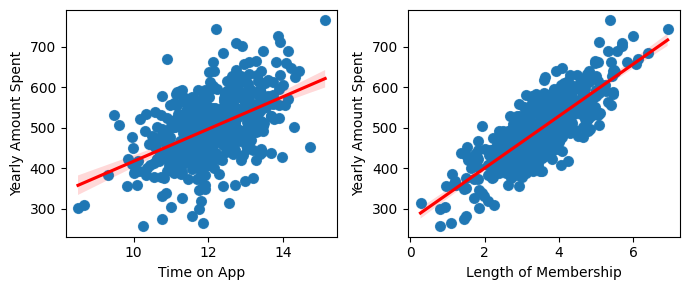

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 3))

ax[0].set_ylabel('Yearly Amount Spent')

sns.regplot(x='Time on App', y='Yearly Amount Spent', data=df, ax=ax[0], scatter_kws={"s": 50}, line_kws={"color": "red"})
ax[0].scatter(x='Time on App', y='Yearly Amount Spent', data=df)
ax[0].set_xlabel('Time on App')

sns.regplot(x='Length of Membership', y='Yearly Amount Spent', data=df, ax=ax[1], scatter_kws={"s": 50}, line_kws={"color": "red"})
ax[1].scatter(x='Length of Membership', y='Yearly Amount Spent', data=df)
ax[1].set_xlabel('Length of Membership')

plt.tight_layout()
plt.show()

2. Target variable

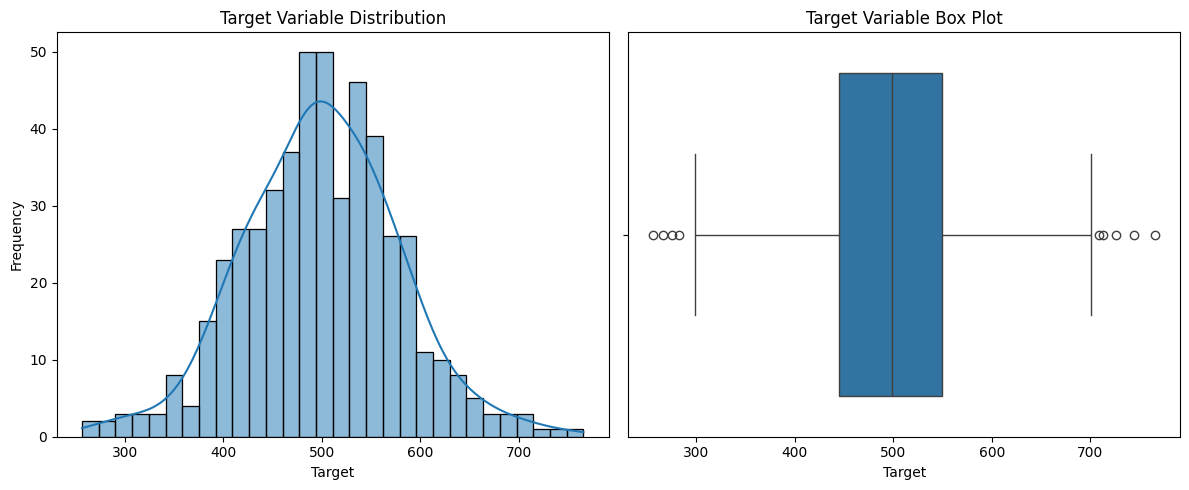

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['Yearly Amount Spent'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Target Variable Distribution')
ax[0].set_xlabel('Target')
ax[0].set_ylabel('Frequency')

sns.boxplot(x=df['Yearly Amount Spent'], ax=ax[1])
ax[1].set_title('Target Variable Box Plot')
ax[1].set_xlabel('Target')

plt.tight_layout()
plt.show()

Left plot shows the histogram of Yearly Amount Spent where it is the highest at around $500. Right plot shows the boxplot of our target variable where we identified some outliers.

3. Correlation between `State` and `Yearly Amount Spent`

https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406

I want to see the correlation between a categorical variable and continuous variable, therefore I will use ANOVA (Analysis of Variance) by looking at the F-test score and p-value. But before that, I want to see the boxplot. 

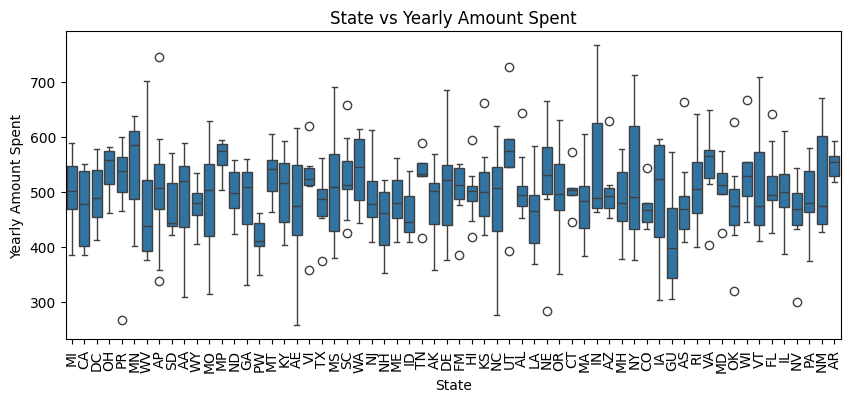

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x='State', y='Yearly Amount Spent', data=df)
plt.xticks(rotation=90)
plt.title('State vs Yearly Amount Spent')
plt.show()

From the boxplot above, there are no significant different between the states which could mean that `State` variable is not relevant to `Yearly Amount Spent`. To confirm this hypothesis I will run the ANOVA analysis.

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = df.rename(columns={'Yearly Amount Spent': 'Yearly_Amount_Spent'})
model = ols('Yearly_Amount_Spent ~ State', data=df).fit()

anova = sm.stats.anova_lm(model, typ=2)
print(anova)

                sum_sq     df         F    PR(>F)
State     3.628269e+05   61.0  0.938377  0.609195
Residual  2.776300e+06  438.0       NaN       NaN


Based on the F-statistic (0.9387) and p-value (0.6091), `State` variable is not relevant to `Yearly Amount Spent`, so I will drop this column

In [26]:
df = df.drop('State', axis = 1)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly_Amount_Spent,email_provider
0,34.497268,12.655651,39.577668,4.082621,587.951054,@fernandez.com
1,31.926272,11.109461,37.268959,2.664034,392.204933,@hotmail.com
2,33.000915,11.330278,37.110597,4.104543,487.547505,@yahoo.com
3,34.305557,13.717514,36.721283,3.120179,581.852344,@gmail.com
4,33.330673,12.795189,37.536653,4.446308,599.406092,@davidson-herman.com


4. Distribution of `email_provider`

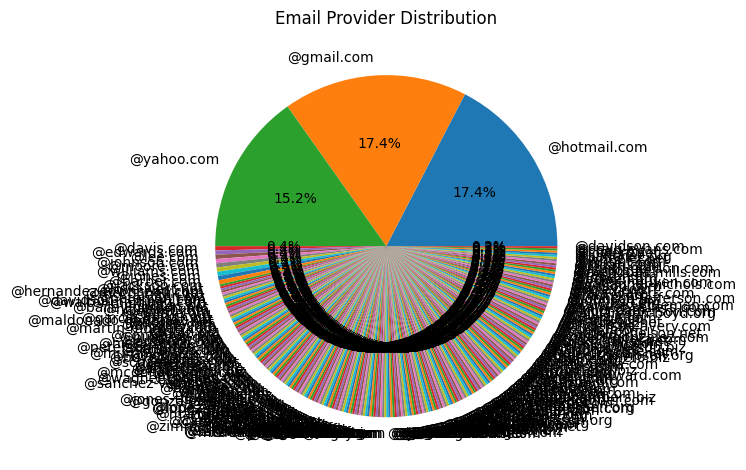

In [27]:
email_counts = df['email_provider'].value_counts()

fig, ax = plt.subplots()

ax.pie(email_counts.values, labels=email_counts.index, autopct='%1.1f%%')
ax.set_title("Email Provider Distribution")

plt.tight_layout()
plt.show()

The plot is very hard to see because there were too many unique values in the column. But there are 3 dominant provider which is `@hotmail.com`, `@gmail.com` and `@yahoo.com`. Other than those 3 providers will be grouped as `others`.

In [28]:
def replace_under(col, percent):
    value_counts = df[col].value_counts(normalize=True) * 100 
    to_replace = value_counts[value_counts < percent].index
    df[col] = df[col].replace(to_replace, 'others') 
    return to_replace

email_replacement = replace_under('email_provider', 15)

replacements = {
    'email_provider': email_replacement,
}

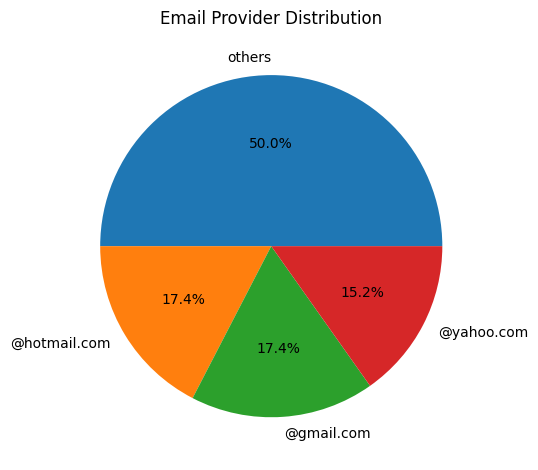

In [29]:
email_counts = df['email_provider'].value_counts()

fig, ax = plt.subplots()

ax.pie(email_counts.values, labels=email_counts.index, autopct='%1.1f%%')
ax.set_title("Email Provider Distribution")

plt.tight_layout()
plt.show()

Now it's easier to see and `others` is now the dominant value taking up half of the distribution.

Save to pickle

In [30]:
filename = 'email_replacement.pkl'
pkl.dump(replacements, open(filename, 'wb'))

# **Split Data**

Dividing the data into 80% training and 20% testing.

In [31]:
input_df = df.drop('Yearly_Amount_Spent', axis = 1)
output_df = df['Yearly_Amount_Spent']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [33]:
print("Shape of training set:", x_train.shape)
x_train.head()

Shape of training set: (400, 5)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,email_provider
249,33.780157,11.917636,36.844734,3.634996,@hotmail.com
433,34.278248,11.822722,36.308545,2.117383,others
19,32.617856,13.989593,37.190504,4.064549,others
322,33.264632,10.732131,36.145792,4.086566,@gmail.com
332,33.144234,11.737041,37.935189,2.190132,@gmail.com


In [34]:
print("Shape of testing set:", x_test.shape)
x_test.head()

Shape of testing set: (100, 5)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,email_provider
361,32.077590,10.347877,39.045156,3.434560,others
73,32.808698,12.817113,37.031539,3.851579,others
374,31.447446,10.101632,38.043453,4.238296,@gmail.com
155,32.449522,13.457725,37.238806,2.941411,others
104,31.389585,10.994224,38.074452,3.428860,others


## **Missing values**

In [35]:
x_train.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
email_provider          0
dtype: int64

In [36]:
x_test.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
email_provider          0
dtype: int64

No missing values found.

# **Feature Engineering**

1. Encode `email_provider` with One Hot Encoder

This column is categaorical and nominal, I will encode using One Hot Encoder because there is no level.

In [37]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()

encode_train = x_train[['email_provider']]
encode_test = x_test[['email_provider']]

train_data = pd.DataFrame(OHE.fit_transform(encode_train).toarray(), columns = OHE.get_feature_names_out())
test_data = pd.DataFrame(OHE.transform(encode_test).toarray(), columns = OHE.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_enc = pd.concat([x_train, train_data], axis = 1)
x_test_enc = pd.concat([x_test, test_data], axis = 1)

Remove the original column, and only keeping the One Hot Encoded columns.

In [38]:
x_train_enc.head()

,index,Avg. Session Length,Time on App,Time on Website,Length of Membership,email_provider,email_provider_@gmail.com,email_provider_@hotmail.com,email_provider_@yahoo.com,email_provider_others
0,249,33.780157,11.917636,36.844734,3.634996,@hotmail.com,0.0,1.0,0.0,0.0
1,433,34.278248,11.822722,36.308545,2.117383,others,0.0,0.0,0.0,1.0
2,19,32.617856,13.989593,37.190504,4.064549,others,0.0,0.0,0.0,1.0
3,322,33.264632,10.732131,36.145792,4.086566,@gmail.com,1.0,0.0,0.0,0.0
4,332,33.144234,11.737041,37.935189,2.190132,@gmail.com,1.0,0.0,0.0,0.0


In [39]:
x_train_enc.columns

Index(['index', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others'],
      dtype='object')

In [40]:
x_train = x_train_enc[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others']]

In [41]:
x_test = x_test_enc[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others']]

Save pickle

In [42]:
filename = 'email_encoder.pkl'
pkl.dump(OHE, open(filename, 'wb'))

# **Scaling**

Before scaling process, we need to identify if outliers are present to determine which scaling method is best.

In [43]:
x_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others'],
      dtype='object')

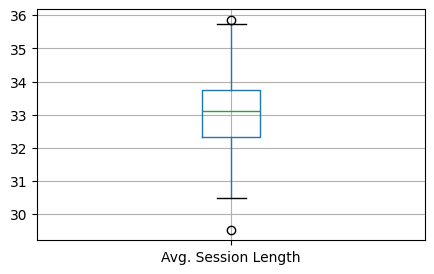

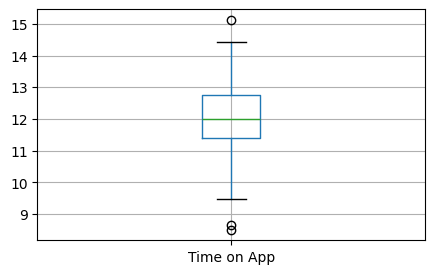

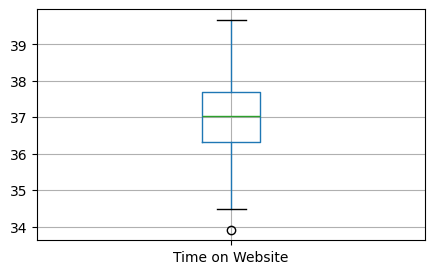

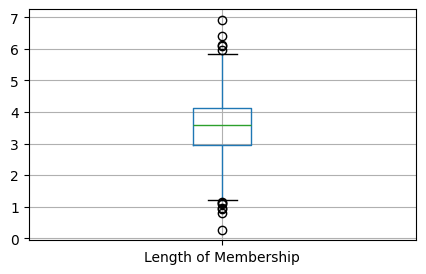

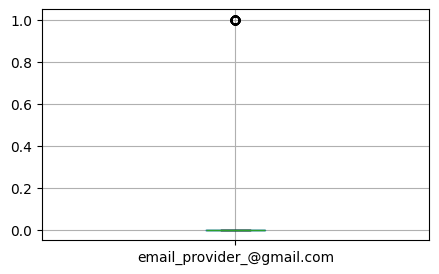

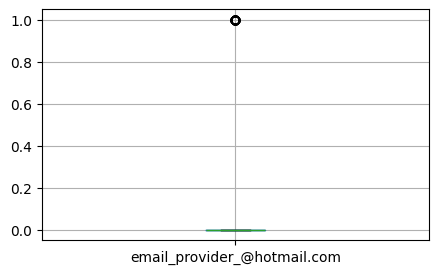

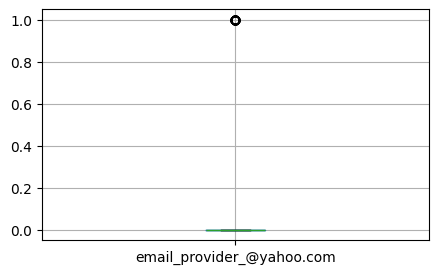

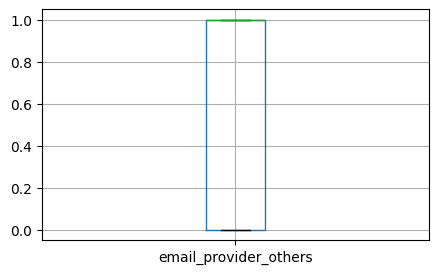

In [44]:
check_cols = x_train[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others']]

for i in check_cols:
    plt.figure(figsize = (5, 3))
    boxplot = x_train.boxplot(column = i)
    plt.show()

Scaling will be done with using Robust Scaler because there are outliers present in all numerical variable and Robust Scaler is best when dealing with outliers.

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scale_cols = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'email_provider_@gmail.com',
       'email_provider_@hotmail.com', 'email_provider_@yahoo.com',
       'email_provider_others']

x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

In [46]:
filename = 'scaler.pkl'
pkl.dump(scaler, open(filename, 'wb'))

# **Modelling**

I will try to use 3 different models and hyperparameter tuning to find the best model. 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [48]:
results = pd.DataFrame(columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R-Square'])

### **1. Linear Regression**

In [49]:
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [50]:
LR_pred = LR.predict(x_test)

In [51]:
mae_LR = mean_absolute_error(y_test, LR_pred)
mse_LR = mean_squared_error(y_test, LR_pred)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, LR_pred)

print("Linear Regression")
print("MAE:", mae_LR)
print("MSE:", mse_LR)
print("RMSE:", rmse_LR)
print("R-Squared:", r2_LR)

Linear Regression
MAE: 8.612292511050937
MSE: 110.51915683823908
RMSE: 10.512809179198445
R-Squared: 0.9776807019981717


In [52]:
LR_result = pd.DataFrame({'y_test': (y_test), 'LR_pred': (LR_pred)})
LR_result.index = range(1, len(LR_result) + 1)
LR_result.head()

,y_test,LR_pred
1,401.033135,402.724163
2,534.777188,542.422338
3,418.602742,427.504643
4,503.978379,501.786723
5,410.069611,409.535170


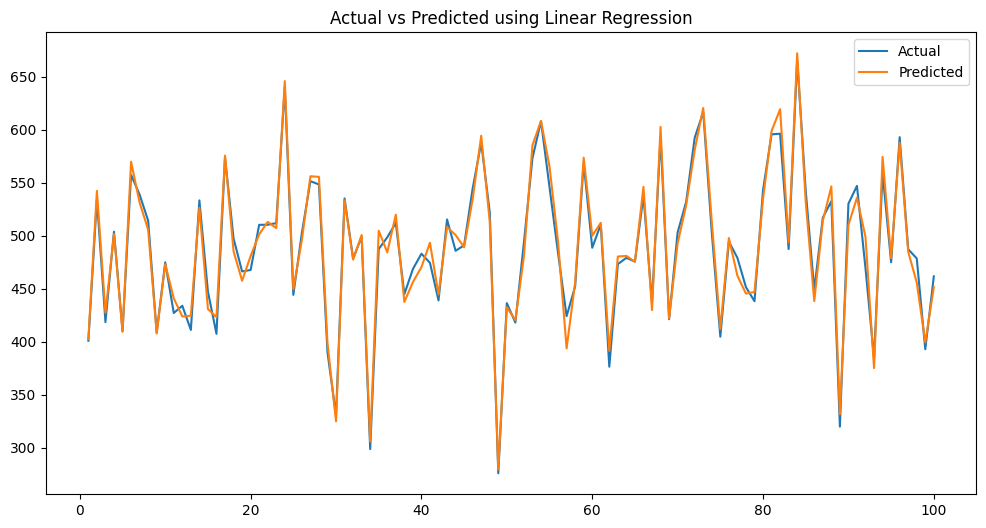

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(LR_result['y_test'], label='Actual')
plt.plot(LR_result['LR_pred'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted using Linear Regression")
plt.show()

The plot above shows the actual data and how the model predicted it. The model managed to predict with a nice performance, following the patterns of the trend. 

In [54]:
model_result = ['Linear Regression', mae_LR, mse_LR, rmse_LR, r2_LR]

results.loc[len(results)] = model_result
results

,Model Name,MAE,MSE,RMSE,R-Square
0,Linear Regression,8.612293,110.519157,10.512809,0.977681


### **2. Decision Tree**

In [55]:
DT = DecisionTreeRegressor()

DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [56]:
DT_pred = DT.predict(x_test)

In [57]:
mae_DT = mean_absolute_error(y_test, DT_pred)
mse_DT = mean_squared_error(y_test, DT_pred)
rmse_DT = np.sqrt(mse_DT)
r2_DT = r2_score(y_test, DT_pred)

print("Decision Tree")
print("MAE:", mae_DT)
print("MSE:", mse_DT)
print("RMSE:", rmse_DT)
print("R-Squared:", r2_DT)

Decision Tree
MAE: 20.89225488570839
MSE: 668.5336325186212
RMSE: 25.85601733675589
R-Squared: 0.8649899094844957


In [58]:
DT_result = pd.DataFrame({'y_test': (y_test), 'DT_pred': (DT_pred)})
DT_result.index = range(1, len(DT_result) + 1)
DT_result.head()

,y_test,DT_pred
1,401.033135,410.602944
2,534.777188,542.711558
3,418.602742,479.731938
4,503.978379,518.064558
5,410.069611,424.675281


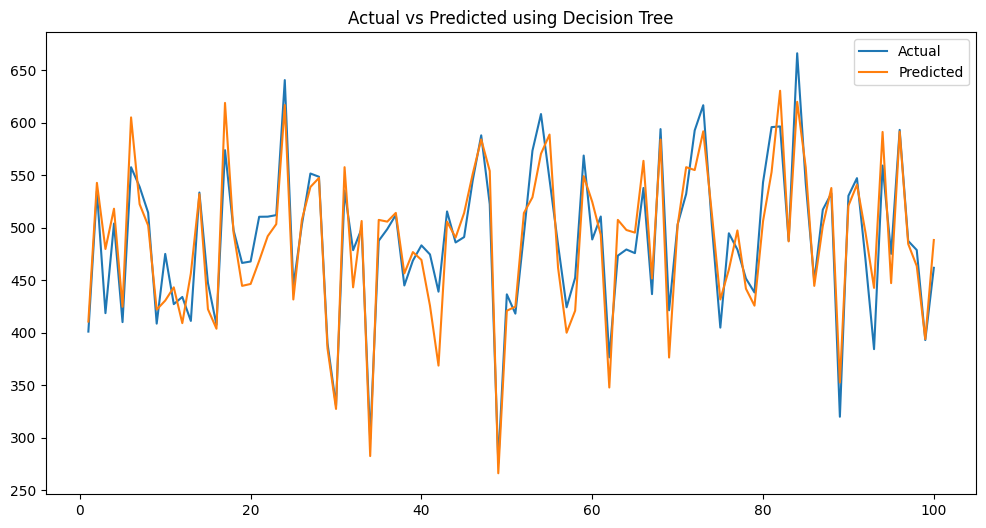

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(DT_result['y_test'], label='Actual')
plt.plot(DT_result['DT_pred'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted using Decision Tree")
plt.show()

In [60]:
model_result = ['Decision Tree', mae_DT, mse_DT, rmse_DT, r2_DT]

results.loc[len(results)] = model_result
results

,Model Name,MAE,MSE,RMSE,R-Square
0,Linear Regression,8.612293,110.519157,10.512809,0.977681
1,Decision Tree,20.892255,668.533633,25.856017,0.864990


### **3. K-Nearest Neighbors**

In [61]:
KNN = KNeighborsRegressor()

KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [62]:
KNN_pred = KNN.predict(x_test)

In [63]:
mae_KNN = mean_absolute_error(y_test, KNN_pred)
mse_KNN = mean_squared_error(y_test, KNN_pred)
rmse_KNN = np.sqrt(mse_KNN)
r2_KNN = r2_score(y_test, KNN_pred)

print("K-Nearest Neighbors")
print("MAE:", mae_KNN)
print("MSE:", mse_KNN)
print("RMSE:", rmse_KNN)
print("R-Squared:", r2_KNN)

K-Nearest Neighbors
MAE: 21.435904254700596
MSE: 758.9895026888819
RMSE: 27.54976411312594
R-Squared: 0.8467223839251059


In [64]:
KNN_result = pd.DataFrame({'y_test': (y_test), 'KNN_pred': (KNN_pred)})
KNN_result.index = range(1, len(KNN_result) + 1)
KNN_result.head()

,y_test,KNN_pred
1,401.033135,409.525577
2,534.777188,528.407765
3,418.602742,450.636554
4,503.978379,480.070981
5,410.069611,426.842508


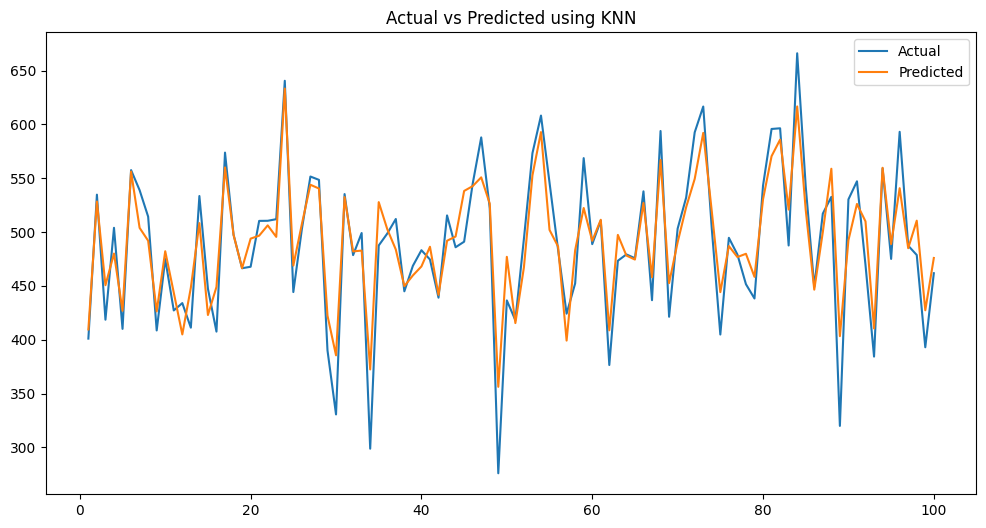

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(KNN_result['y_test'], label='Actual')
plt.plot(KNN_result['KNN_pred'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted using KNN")
plt.show()

In [66]:
model_result = ['KNN 1', mae_KNN, mse_KNN, rmse_KNN, r2_KNN]

results.loc[len(results)] = model_result
results

,Model Name,MAE,MSE,RMSE,R-Square
0,Linear Regression,8.612293,110.519157,10.512809,0.977681
1,Decision Tree,20.892255,668.533633,25.856017,0.864990
2,KNN 1,21.435904,758.989503,27.549764,0.846722


#### **Metrics Used**

1. MAE (Mean Absolute Error): measures the average of the absolute error between actual values and predicted values. The absolute function will make the error values forced to be positive. 

*Advantages of MAE*: more robust when outliers are present and we get the same unit of scale as the output variable, so it's easy to interpret.

2. MSE (Mean Squared Error): measures the squared distance between actual values and predicted values. 

*Advantages of MSE*: Squaring the mistakes gives more weight to larger errors making MSE more useful when you want to identify larger errors. High MSE score means there are more large error found.

3. RMSE (Root Mean Squared Error): square root of MSE, now it's much more easier to interpret because it's in the same unit scale of the output variable. 

*Advantages of RMSE*: good metric to find larger errors and easier to interpret than MSE. 

4. R-squared: measures how much variation in the actual data is explained by the model. 


How to read the metrics:
- MAE: **lower** MAE shows better performance
- MSE: **lower** MSE shows better performance
- RMSE: **lower** RMSE shows better performance
- R-squared: **closer to 1** shows better performance

# **Model Evaluation**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Model Name</th>
      <th>MAE</th>
      <th>MSE</th>
      <th>RMSE</th>
      <th>R-Square</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Linear Regression 1</td>
      <td>8.612293</td>
      <td>110.519157</td>
      <td>10.512809</td>
      <td>0.977681</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Decision Tree 1</td>
      <td>22.191849</td>
      <td>795.980465</td>
      <td>28.213126</td>
      <td>0.839252</td>
    </tr>
    <tr>
      <th>2</th>
      <td>KNN 1</td>
      <td>21.435904</td>
      <td>758.989503</td>
      <td>27.549764</td>
      <td>0.846722</td>
    </tr>
  </tbody>
</table>
</div>

1. *Linear Regression* shows the best performance among all models with the least MAE, MSE, RMSE and a preferably high R-Squared value of 97%. 
2. *Decision Tree* performs nice but has more error than linear regression and slightly more error than KNN. 
3. *K-Nearest Neighbors*: performs similarly to Decision Tree but has smaller error and fits better than Decision Tree.

In summary, **Linear Regression** model has the best performance in predicting the `Yearly Amount Spent` of the customers with an almost perfect fit of 97%. 

Save model to pickle

In [67]:
filename = 'linear_regression.pkl'
pkl.dump(LR, open(filename, 'wb'))